In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
from operator import itemgetter
from typing import Callable, Dict, List, Set, Tuple
from scipy.optimize import curve_fit
import csv
import json
from collections import defaultdict

import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from matplotlib import rcParams
from operator import itemgetter
from typing import Callable, Dict, List, Set, Tuple
from scipy.signal import savgol_filter
import math 

In [2]:
from util import calculate_derivative,pointInterval_to_pressure
from baseline import detect_breakpoints_startPoint, detect_breakpoints, detect_breakpoints_2, detect_breakpoints_3,detect_breakpoints_4,detect_breakpoints_startPoint2
from plot import PlotNSave
from data_load_N_preprocess import LoadNPreprocessData
from pattern_recognition2 import polyval_func_wrapper,linear_func_wrapper,PatternRecognition

In [ ]:
#!pip install astropy

In [ ]:
file_path=pressure_filePath="../data_input/pattern_left.txt"
pattern_left = pd.read_csv(file_path, delimiter=" ",skiprows=1, names=["X", "Y"],skipinitialspace = True)
pattern_left["X"]= pattern_left["X"]-pattern_left["X"][0]
pattern_left["Y"]= pattern_left["Y"]-pattern_left["Y"][0]
print(pattern_left.describe())


pattern_left_top=pattern_left.loc[pattern_left["Y"]>0]
pattern_left_bottom=pattern_left.loc[pattern_left["Y"]<0]

In [ ]:
file_path=pressure_filePath="../data_input/pattern_right_top.txt"
pattern_right_top = pd.read_csv(file_path, delimiter=" ",skiprows=1, names=["X", "Y"],skipinitialspace = True)
pattern_right_top["X"]= pattern_right_top["X"]-pattern_right_top["X"][0]
pattern_right_top["Y"]= pattern_right_top["Y"]-pattern_right_top["Y"][0]
pattern_right_top= pattern_right_top.clip(lower=0)
print(pattern_right_top.describe())
# pd.set_option('display.max_rows', pattern_right_top.shape[0]+1)
# pattern_right_top 


In [ ]:
file_path=pressure_filePath="../data_input/pattern_right_bottom.txt"
pattern_right_bottom = pd.read_csv(file_path, delimiter=" ",skiprows=1, names=["X", "Y"],skipinitialspace = True)
pattern_right_bottom["X"]= pattern_right_bottom["X"]-pattern_right_bottom["X"][0]
pattern_right_bottom["Y"]= pattern_right_bottom["Y"]-pattern_right_bottom["Y"][0]

pattern_right_bottom= pattern_right_bottom.clip(lower=0)

print(pattern_right_bottom.describe())


In [ ]:
def test_func_1(x, a,b,c,d):
    y = a+b*x-c*np.exp(d*x)
    return y
def test_func_2(x, a,b,c,d):
    y = a+b*x-c*np.exp(-d*x)
    return y

In [ ]:
def fit_curve(xdata,ydata,test_func):
    x = np.asarray(xdata)
    y = np.asarray(ydata)
    parameters, covariance = curve_fit(test_func, x, y)
#     parameters, covariance = curve_fit(test_func, xdata, ydata)

    fit_a = parameters[0]
    fit_b = parameters[1]
    fit_c = parameters[2]
    fit_d = parameters[3]

    print(F'The parameters is {parameters}.')


    y_fit = test_func(x, fit_a, fit_b,fit_c,fit_d)

    plt.plot(x, y, 'o', label='data')
    plt.plot(x, y_fit, '-', label='LJ fit')
    return fit_a,fit_b,fit_c,fit_d

In [ ]:
fit_parameters={}
curves=[pattern_left_top,pattern_left_bottom,pattern_right_top,pattern_right_bottom]
test_func=[test_func_1,test_func_1,test_func_2,test_func_2]
names=["pattern_left_top","pattern_left_bottom","pattern_right_top","pattern_right_bottom"]
for curve, func,name in zip(curves,test_func,names):
    xdata=curve["X"]
    ydata=curve["Y"]
    fit_parameters[name]=fit_curve(xdata,ydata,func)


In [ ]:
def polyval_func_wrapper(x, *parameters):
    y = np.polyval(parameters,x)
    return y
def linear_func_wrapper(x, a,b):
    y = a*x+b
    return y
xdata=[1,2,3]
ydata=[4,5,6]
x = np.asarray(xdata)
y = np.asarray(ydata)
fitting_func=polyval_func_wrapper
parameters=np.polyfit(x,y,3)
# fitting_func=linear_func_wrapper
# parameters, covariance = curve_fit(fitting_func, x, y)
print(parameters)
y_fit=fitting_func(x, *parameters)
y_fit

# Synthetic_1

In [3]:
#experiment setup
ground_truth=[107, 164, 243, 328, 375, 446, 644, 713, 771, 820, 887, 953, 1036, 1101, 1179, 1254, 1319, 1396, 1456, 1513, 1598, 1648, 1719, 1784, 1875, 1938, 2017, 2073, 2185, 2247, 2315, 2369, 2433, 2487, 2552, 2610, 2835, 2916, 2965, 3044, 3101, 3240, 3284, 3368, 3411]
print(len(ground_truth))
# colum_names ={"pressure":{"Date","Pressure (psia)","first_order_derivative","second_order_derivative"},
#                     "rate":{"Time@end","Liquid rate (STB/D)"}}

colum_names={"pressure":{"time":"Date",
                        "measure":"Pressure (psia)",
                        "first_order_derivative":"first_order_derivative",
                        "second_order_derivative":"second_order_derivative"},
             "rate":{"time":"Time@end",
                     "measure":"Liquid rate (STB/D)"}}
data_inOneRow=400
pressure_filePath="../data_input/Synthetic_Data.xlsx"
rate_filePath="../data_input/Synthetic_Data.xlsx"

45


In [4]:
ground_truth_buildUp=[point for index, point in enumerate(ground_truth) if index%2!=0]
ground_truth_buildUp
len(ground_truth_buildUp)

22

In [5]:
ground_truth_buildDrawdown=[point for index, point in enumerate(ground_truth) if index%2==0]
ground_truth_buildDrawdown
len(ground_truth_buildDrawdown)

23

In [6]:
processed_data=LoadNPreprocessData(pressure_filePath=pressure_filePath, 
                 rate_filePath=rate_filePath, 
                 colum_names=colum_names, 
                 use_SG_smoothing=False)
pressure_df=processed_data.pressure_df
rate_df=processed_data.rate_df

display(pressure_df)
display(rate_df)

---load data from 'txt' or 'xlsx' files...
---The first & second order derivative has been calculated and appended to pressure dataframe


,Date,Pressure (psia),first_order_derivative,second_order_derivative
0,0.000000,2000.000000,15175.401994,-1.593896e+06
1,0.006111,2092.738568,5434.926885,-2.211251e+05
2,0.012222,2125.952010,4083.606969,-1.648675e+05
3,0.018056,2149.773050,3121.879672,-7.945161e+04
4,0.024167,2168.851204,2636.342081,-5.537004e+04
...,...,...,...,...
3514,5938.051389,2327.338989,-0.150989,1.763948e-04
3515,5968.345556,2322.764893,-0.145646,1.653610e-04
3516,5998.640000,2318.352641,-0.140636,1.544522e-04
3517,6028.934444,2314.092149,-0.135957,0.000000e+00


,Time@end,Liquid rate (STB/D)
0,0.000000,-6742.395145
1,253.216667,-8513.514104
2,264.358333,0.000000
3,274.191667,-5548.484464
4,296.716667,-8951.244013
...,...,...
90,4465.793056,0.107707
91,4465.834722,0.105123
92,4465.909722,-1909.311284
93,5058.868056,-5453.279913


{'buildUp': {'left_top': array([ 9.44947194e+03,  1.70195899e+02, -5.14787431e+01,  7.78260316e-04]),
  'left_bottom': array([ 5.68362323e+04, -6.25953527e+02,  3.51861465e+02, -9.06842313e-03]),
  'right_top': array([ 1.98633499e+07, -1.02594438e+06,  2.00614262e+04,  6.45184429e-01]),
  'right_bottom': array([ 9.63569997e+06, -4.90035851e+05,  9.46329226e+03,  2.87447639e-01])},
 'drawDown': {'left_top': array([5.75188902e-04, 8.70273204e-03, 1.73394258e+00, 1.37059920e-01]),
  'left_bottom': array([4.94755248e+04, 5.24511817e+02, 2.36365864e+00, 1.00109972e-03]),
  'right_top': array([-1.07674374e+07,  5.93868428e+05, -1.22033594e+04, -5.03778779e-01]),
  'right_bottom': array([-2.95122954e+07,  1.51537958e+06, -2.96223402e+04, -9.45103003e-01])}}

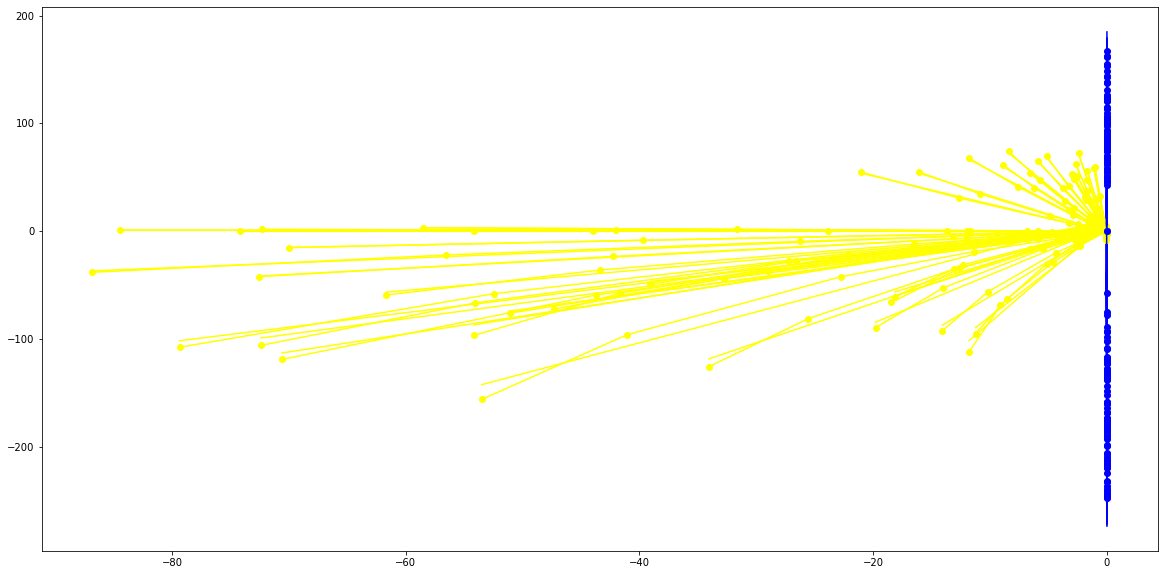

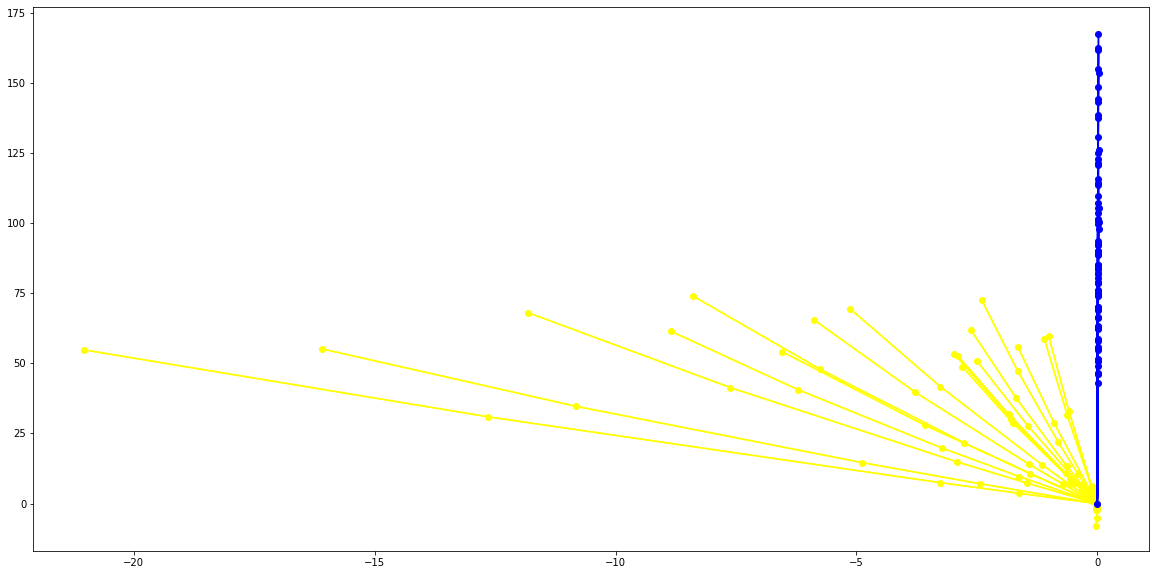

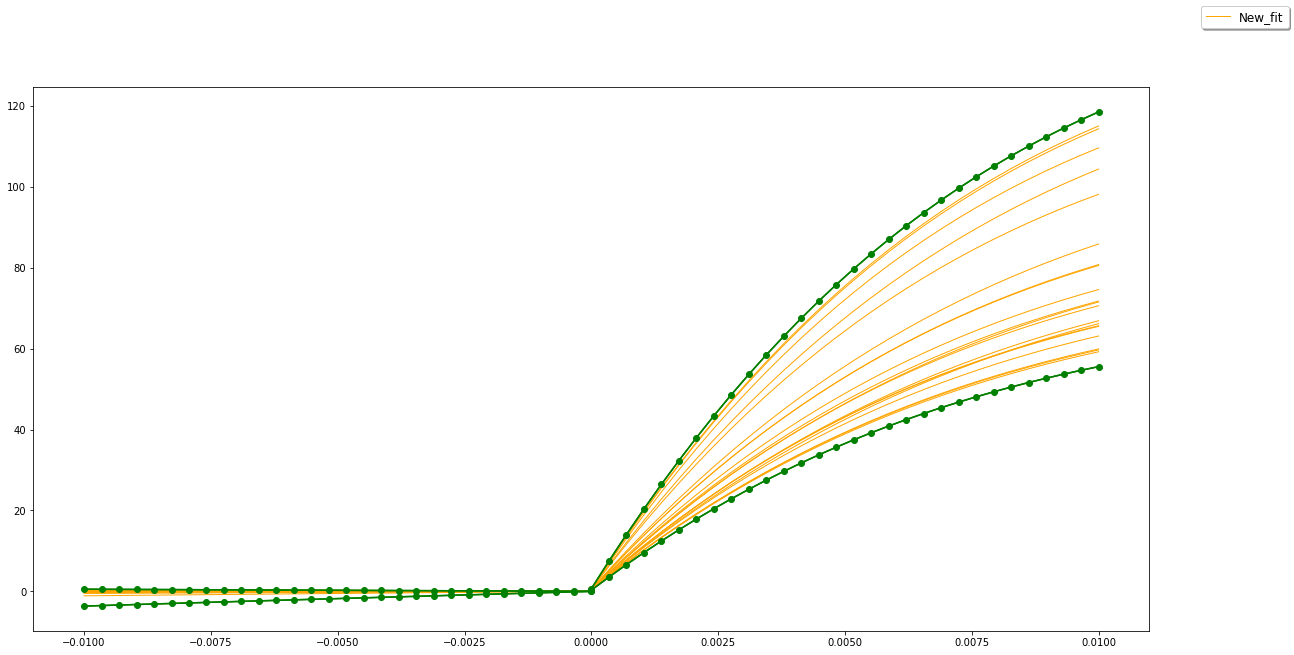

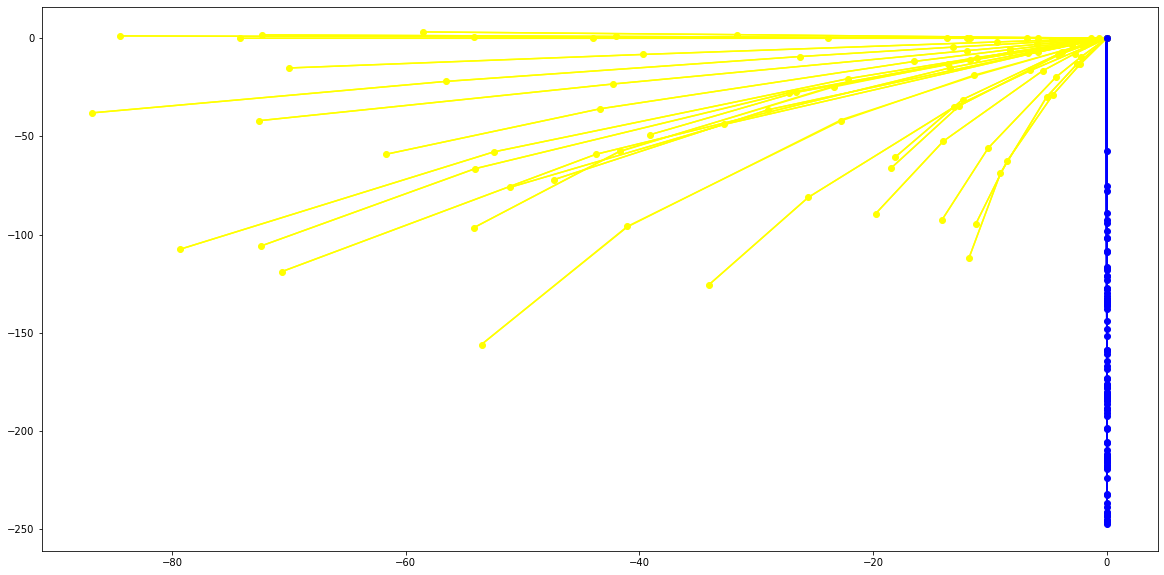

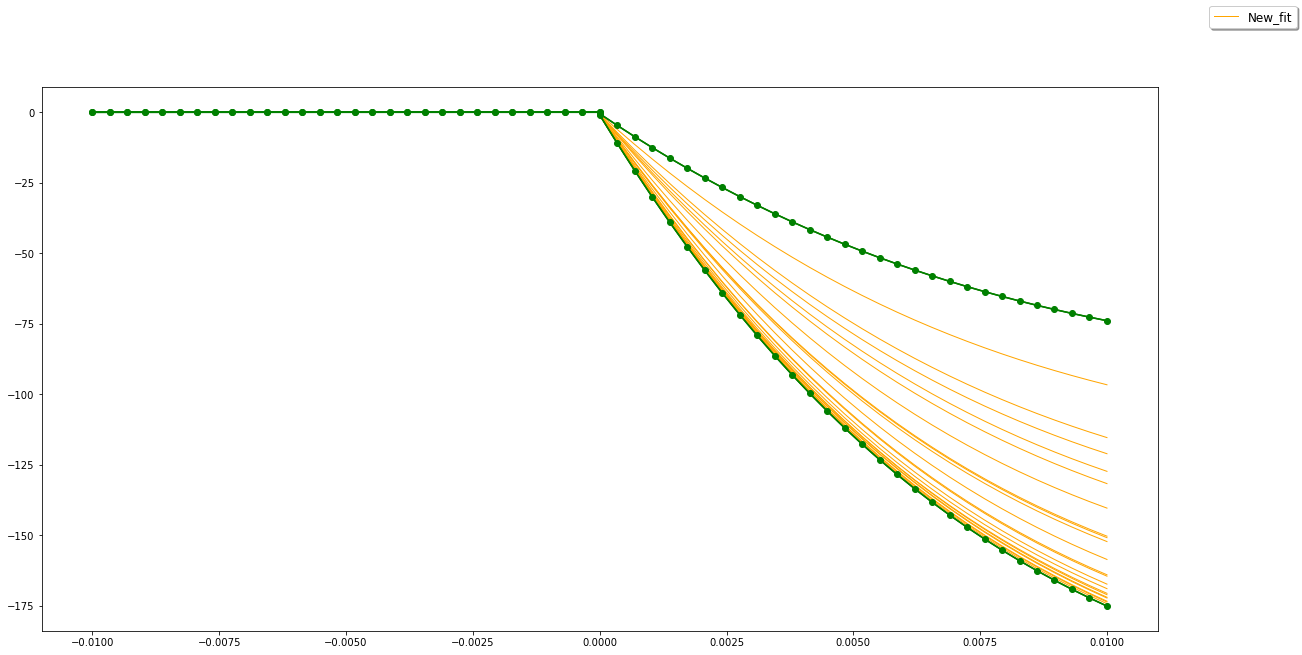

In [7]:
pressure_measure=list(pressure_df[colum_names["pressure"]["measure"]])
pressure_time=list(pressure_df[colum_names["pressure"]["time"]])
identfication_UsePattern=PatternRecognition(point_halfWindow=5,time_halfWindow=0.01,)
identfication_UsePattern.learn(pressure_measure,pressure_time,ground_truth)
identfication_UsePattern.parameters_twoPatterns

In [8]:
identfication_UsePattern.parameters_twoPatterns

{'buildUp': {'left_top': array([ 9.44947194e+03,  1.70195899e+02, -5.14787431e+01,  7.78260316e-04]),
  'left_bottom': array([ 5.68362323e+04, -6.25953527e+02,  3.51861465e+02, -9.06842313e-03]),
  'right_top': array([ 1.98633499e+07, -1.02594438e+06,  2.00614262e+04,  6.45184429e-01]),
  'right_bottom': array([ 9.63569997e+06, -4.90035851e+05,  9.46329226e+03,  2.87447639e-01])},
 'drawDown': {'left_top': array([5.75188902e-04, 8.70273204e-03, 1.73394258e+00, 1.37059920e-01]),
  'left_bottom': array([4.94755248e+04, 5.24511817e+02, 2.36365864e+00, 1.00109972e-03]),
  'right_top': array([-1.07674374e+07,  5.93868428e+05, -1.22033594e+04, -5.03778779e-01]),
  'right_bottom': array([-2.95122954e+07,  1.51537958e+06, -2.96223402e+04, -9.45103003e-01])}}

In [8]:
identfication_UsePattern.parameters_allCurves

,left_curves_parameters,right_curves_parameters
0,"[5.825779166210675e-05, -0.003076299270022085,...","[-25439779.782496437, 1305731.7058000371, -255..."
1,"[0.010006757581135272, -0.02149463803860218, 4...","[-26748084.541755076, 1372879.255569968, -2682..."
2,"[0.0009725907473001219, -0.002274200260008804,...","[-28220739.214589205, 1448467.1965302154, -283..."
3,"[2.0207824148681746e-06, -0.000673602867109790...","[-29530577.699926734, 1515698.3983067938, -296..."
4,"[0.0005751894468209895, 0.00870273204304437, 1...","[-29091908.78901348, 1502600.718632119, -29391..."
5,"[6.355748010284458e-05, -0.0003764472009621092...","[-28656847.142956976, 1480129.730721688, -2895..."
6,"[0.019425115218814754, -0.025719835370105238, ...","[-27483248.313711416, 1419513.0633115543, -277..."
7,"[6.328727846283953e-05, -0.001007753848157923,...","[-28855795.94192032, 1490405.4621852676, -2915..."
8,"[8.455185304909013e-05, -0.0026623327808248548...","[-10767437.430783624, 593868.4282508221, -1220..."
9,"[0.03908740105953, 0.10461514424572044, 5.3057...","[-23520763.64116691, 1214850.1910103024, -2375..."


In [ ]:
buildup,drawdown=identfication_UsePattern.predict(pressure_measure,pressure_time)
buildup,drawdown

In [ ]:
len(buildup),len(drawdown)

In [ ]:
display(identfication_UsePattern.data_forPredict.iloc[0]["buildUp"])
identfication_UsePattern.data_forPredict.iloc[0]["drawDown"]

In [ ]:
identfication_UsePattern.data_forPredict

In [ ]:
filename_toSave=""
plot_name="Synthetic_PatternRecognition_method"
plot_whole=True
plot_details=True
plot_statistics=False
PlotNSave(pressure_df,
          rate_df,
          buildup,
          [],
          data_inOneRow,
          plot_name,
          filename_toSave,
          plot_statistics,
          plot_whole,
          plot_details,
          colum_names)

In [ ]:
pressure_measure=list(pressure_df[colum_names["pressure"]["measure"]])
pressure_time=list(pressure_df[colum_names["pressure"]["time"]])
identfication_UsePattern=PatternRecognition(point_halfWindow=5,time_halfWindow=0.005,)
identfication_UsePattern.learn(pressure_measure,pressure_time,ground_truth)
identfication_UsePattern.parameters_twoPatterns

# real case data

## raw data

In [ ]:
#experiment setup
ground_truth_temp=[2249,  2467,  2805,[2875, 2876],3100,3561,3994,[4228, 4232],4753,4895, 5297,5436,5985,[6543, 6547], 7249,[7544, 7545],7946,[8362, 8364],9025,[9607, 9608],10149,10216, 10528,[10801, 10804],11340,  11479,12363,[13039, 13040],13868, 14086,14774,15341,16098,16619,[17589, 17590],18435,19643,19764,20021,20349,20701,21030,21974,22186,22710,23220,24215,24685,25717,26006,26656, 26759,27023,[27316,27327],27773,[27966,27970],28322,28497,28832,29115]
# ground_truth=[]

colum_names   ={"pressure":{"time":"Elapsed time",
                             "measure":"Data",
                             "first_order_derivative":"first_order_derivative",
                             "second_order_derivative":"second_order_derivative"},
                "rate":{"time":"Elapsed time",
                        "measure":"Liquid rate"}}
data_inOneRow=1000
pressure_filePath="../data_input/EAGE_Shchipanov_2017/Pressure.txt"
rate_filePath="../data_input/EAGE_Shchipanov_2017/Rate.txt"

ground_truth=[]
for point in ground_truth_temp: 
    if "list" in str(type(point)):
        ground_truth.append(math.ceil(sum(point)/len(point)))
    else:
        ground_truth.append(point)
                     
print("len(ground_truth):",len(ground_truth))
processed_data=LoadNPreprocessData(pressure_filePath=pressure_filePath, 
                 rate_filePath=rate_filePath, 
                 colum_names=colum_names, 
                 use_SG_smoothing=False)
pressure_df=processed_data.pressure_df
rate_df=processed_data.rate_df

display(pressure_df)
display(rate_df)
# display(processed_data.pressureNrate_df)

first_order_derivative=pressure_df["first_order_derivative"]
second_order_derivative=pressure_df["second_order_derivative"]

In [ ]:
pressure_measure=list(pressure_df[colum_names["pressure"]["measure"]])
pressure_time=list(pressure_df[colum_names["pressure"]["time"]])
identfication_UsePattern=PatternRecognition(delta_pointNumber =5)
identfication_UsePattern.learn(pressure_measure,pressure_time,ground_truth)
identfication_UsePattern.parameters_twoPatterns

In [ ]:
buildup,drawdown=identfication_UsePattern.predict(pressure_measure,pressure_time)
print(len(buildup),len(drawdown))
buildup,drawdown

In [ ]:
print(len(breakpoints))
breakpoints

In [ ]:
buildup,drawdown=identfication_UsePattern.detect_breakpoint_type(pressure_measure,pressure_time,ground_truth)
# identfication_UsePattern.parameters_allCurves
print(len(buildup),buildup)
# print(len(ground_truth_buildUp),ground_truth_buildUp)
print(len(drawdown),drawdown)

In [ ]:
breakpoint_buildUp=[]
breakpoint_drawDown=[]
for index,parameter in identfication_UsePattern.parameters_allCurves.iterrows():
    #compare slope and convert index in the parameters_allCurves to in pressure_df
    if parameter["left_curves_parameters"][0]<parameter["right_curves_parameters"][0]:
        breakpoint_buildUp.append(ground_truth_buildUp[index])
    else:
        breakpoint_drawDown.append(ground_truth_buildUp[index])


In [ ]:
# data={"left_curve_parameters":identfication_UsePattern.curveLeft_parameters,
#      "right_curve_parameters":identfication_UsePattern.curveRight_parameters}
# df=pd.DataFrame(data)
# display(df)
# for index,row in df.iterrows():
#     print(row["left_curve_parameters"], row["left_curve_parameters"][-1])

In [ ]:
identfication_UsePattern.sav_pattern()

In [ ]:
identfication_UsePattern.load_pattern()
identfication_UsePattern.parameters_PatternField 

In [ ]:
filePath_learnedPattern="../data_output/Learned_Pattern.csv"
border_names=["left_top","left_bottom","right_top","right_bottom"]
paras_df = pd.read_csv(filePath_learnedPattern, delimiter=" ",skiprows=1, names=border_names,skipinitialspace = True) 
paras_df

In [ ]:
# #spline interpolation
# x_i=np.linspace(0,10,100)
# f_spline=interpld(xdata,ydata,kind="cubic")
# y_is=f_spline(x_i)

In [ ]:
a={"pressure_time_right":[1,2,3],
"pressure_measure_right":[4,5,6]}
b={key:[value] for key,value in a.items()}
pd.DataFrame(a)
pd.DataFrame(b)

In [ ]:
curveData= pd.DataFrame({'Odd':[[1,3,15,6,7,9]], 'Even':[[0,12,4,6,8,10]]})
data = pd.DataFrame({'Odd':[[1,3,5,6,7,9]], 'Even':[[0,2,4,6,8,10]]})
curveData=curveData.append(data,ignore_index=True)
# data=data.iloc[::-1]
display(curveData)
for index,row in curveData.iterrows():
#     print(row)
#     row['Odd'].reverse()
    print(row.index)
display(curveData)

## denoised data

In [ ]:
#experiment setup
ground_truth_temp=[2249,  2467,  2805,[2875, 2876],3100,3561,3994,[4228, 4232],4753,4895, 5297,5436,5985,[6543, 6547], 7249,[7544, 7545],7946,[8362, 8364],9025,[9607, 9608],10149,10216, 10528,[10801, 10804],11340,  11479,12363,[13039, 13040],13868, 14086,14774,15341,16098,16619,[17589, 17590],18435,19643,19764,20021,20349,20701,21030,21974,22186,22710,23220,24215,24685,25717,26006,26656, 26759,27023,[27316,27327],27773,[27966,27970],28322,28497,28832,29115]
# ground_truth=[]

colum_names   ={"pressure":{"time":"Elapsed time",
                             "measure":"Data",
                             "first_order_derivative":"first_order_derivative",
                             "second_order_derivative":"second_order_derivative"},
                "rate":{"time":"Elapsed time",
                        "measure":"Liquid rate"}}
data_inOneRow=1000
pressure_filePath="../data_input/EAGE_Shchipanov_2017/Pressure.txt"
rate_filePath="../data_input/EAGE_Shchipanov_2017/Rate.txt"
ground_truth=[]
for point in ground_truth_temp: 
    if "list" in str(type(point)):
        ground_truth.append(math.ceil(sum(point)/len(point)))
    else:
        ground_truth.append(point)
                     
print("len(ground_truth):",len(ground_truth))

In [ ]:
processed_data_denoised=LoadNPreprocessData(pressure_filePath=pressure_filePath, 
                 rate_filePath=rate_filePath, 
                 colum_names=colum_names, 
                 use_SG_smoothing=True)
pressure_df_denoised=processed_data_denoised.pressure_df

In [ ]:
pressure_df=pressure_df_denoised
pressure_measure=list(pressure_df[colum_names["pressure"]["measure"]])
pressure_time=list(pressure_df[colum_names["pressure"]["time"]])
identfication_UsePattern=PatternRecognition()
identfication_UsePattern.learn(pressure_measure,pressure_time,ground_truth)
# identfication_UsePattern.parameters_twoPatterns
buildup,drawdown=identfication_UsePattern.predict(pressure_measure,pressure_time)
print(len(buildup),len(drawdown))
buildup,drawdown

In [ ]:
pressure_df=pressure_df_denoised
pressure_measure=list(pressure_df[colum_names["pressure"]["measure"]])
pressure_time=list(pressure_df[colum_names["pressure"]["time"]])
identfication_UsePattern=PatternRecognition(point_halfWindow=10,time_halfWindow=0.05)
identfication_UsePattern.learn(pressure_measure,pressure_time,ground_truth)
# identfication_UsePattern.parameters_twoPatterns
buildup,drawdown=identfication_UsePattern.predict(pressure_measure,pressure_time)
print(len(buildup),len(drawdown))
# buildup,drawdown